In [1]:
import pandas as pd

In [2]:
path = "https://raw.githubusercontent.com/10Dennisw/house-price-prediction/main/datasets/HousingPrices-Amsterdam-August-2021.csv"
df = pd.read_csv(path)

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [4]:
for col in df.columns:
    print(col)
    print("--> Type:", df.dtypes[col])

Address
--> Type: object
Zip
--> Type: object
Price
--> Type: float64
Area
--> Type: int64
Room
--> Type: int64
Lon
--> Type: float64
Lat
--> Type: float64


### Summary Statistics

In [5]:
explore_columns_lst = ['Price', 'Area', 'Room']
for col in explore_columns_lst:
    print("--> Variable:",col)
    print(df[col].describe())
    print()

--> Variable: Price
count    9.200000e+02
mean     6.220654e+05
std      5.389942e+05
min      1.750000e+05
25%      3.500000e+05
50%      4.670000e+05
75%      7.000000e+05
max      5.950000e+06
Name: Price, dtype: float64

--> Variable: Area
count    924.000000
mean      95.952381
std       57.447436
min       21.000000
25%       60.750000
50%       83.000000
75%      113.000000
max      623.000000
Name: Area, dtype: float64

--> Variable: Room
count    924.000000
mean       3.571429
std        1.592332
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: Room, dtype: float64



### Identifying missing data

In [6]:
df.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Address,Zip,Price,Area,Room,Lon,Lat
73,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


### Data Distribution

In [8]:
import matplotlib.pyplot as plt

In [9]:
total_outlier_list = []

In [10]:
def plotting_boxplot_and_histogram(df, col_name):
    # Adjust the size of the entire figure
    plt.figure(figsize=(12, 5))  # Example size: 10 inches by 5 inches

    # Plot 1: Boxplot
    plt.subplot(1, 2, 1) 
    df.boxplot(column=[col_name])
    plt.title('Boxplot of Variable ' + col_name)

    # Plot 2: Histogram
    plt.subplot(1, 2, 2) 
    plt.hist(df[col_name], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Variable ' + col_name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Display the plots
    plt.show()


In [11]:
def finding_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

    # Identifying the outliers, which are above or below the IQR
    outliers = df[(df[column_name] > upper_whisker) | (df[column_name] < lower_whisker)]
    
    # Counting points
    points_above = outliers[column_name][outliers[column_name] > upper_whisker].count()
    points_below = outliers[column_name][outliers[column_name] < lower_whisker].count()
    
    points_above = df[column_name][df[column_name] > upper_whisker].count()
    points_below = df[column_name][df[column_name] < lower_whisker].count()
    print(f"The number of points above: {points_above}")
    print(f"The number of points below: {points_below}")
    print(f"--> Total Number of Outliers: {points_above + points_below}")

    outlier_indices = outliers.index # saving the indices
    return outlier_indices

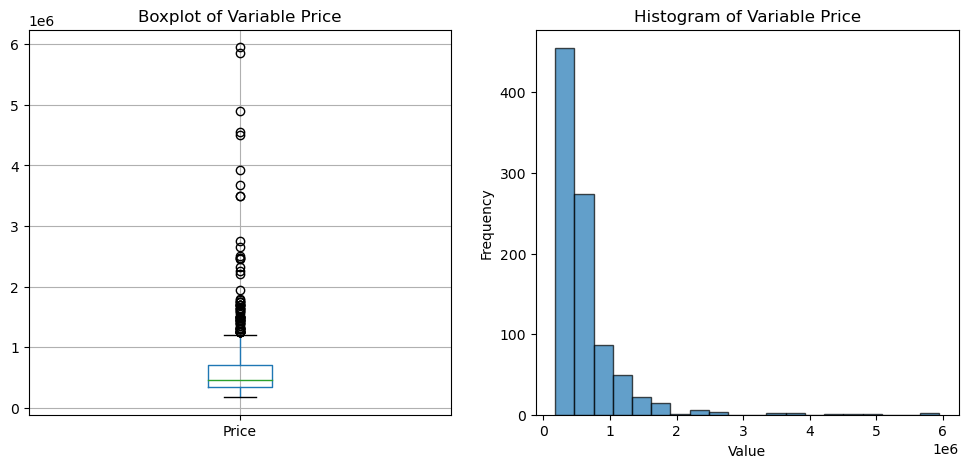

In [12]:
plotting_boxplot_and_histogram(df, 'Price')

In [13]:
outlier_indices = finding_outliers(df, 'Price')
outlier_indices_list = outlier_indices.tolist()

total_outlier_list.extend(outlier_indices_list)

The number of points above: 71
The number of points below: 0
--> Total Number of Outliers: 71


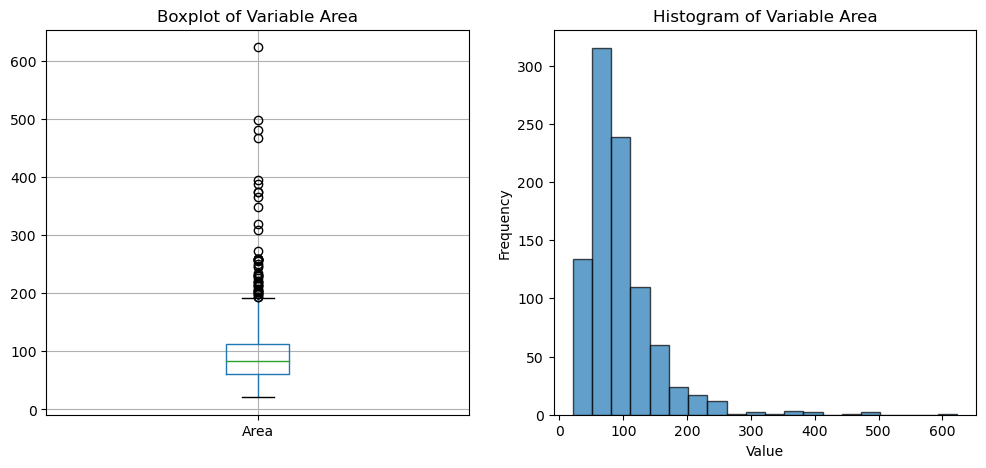

In [14]:
plotting_boxplot_and_histogram(df, 'Area')

In [15]:
outlier_indices = finding_outliers(df, 'Area')
outlier_area_list = outlier_indices.tolist()

# adding only new indices to the outlier list
for i in outlier_area_list:
    if i in total_outlier_list:
        pass
    else:
        total_outlier_list.append(i)

The number of points above: 47
The number of points below: 0
--> Total Number of Outliers: 47


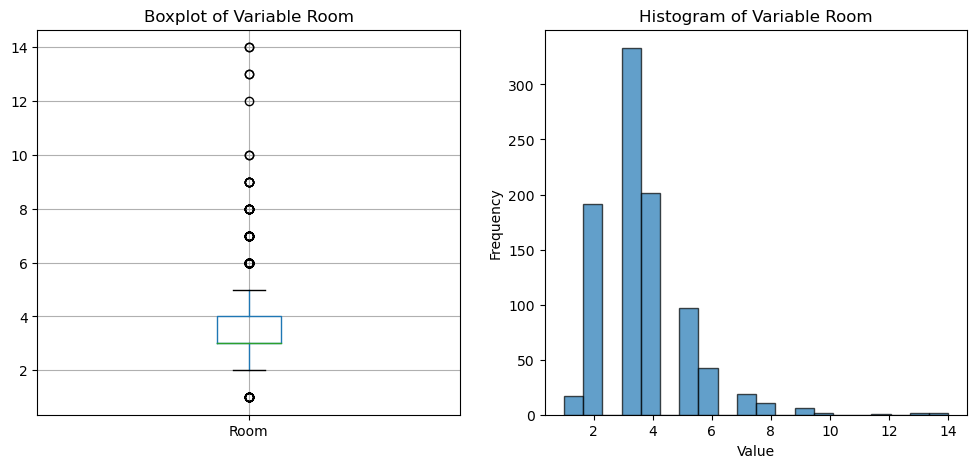

In [16]:
plotting_boxplot_and_histogram(df, 'Room')

In [17]:
outlier_indices = finding_outliers(df, 'Room')
outlier_area_list = outlier_indices.tolist()

# adding only new indices to the outlier list
for i in outlier_area_list:
    if i in total_outlier_list:
        pass
    else:
        total_outlier_list.append(i)

The number of points above: 85
The number of points below: 17
--> Total Number of Outliers: 102


In [18]:
print(f"The total number of outliers found is {len(total_outlier_list)}")

The total number of outliers found is 141


In [19]:
df_cleaned = df.drop(total_outlier_list)
df_cleaned # the cleaned df with dropping all outliers removed

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
...,...,...,...,...,...,...,...
916,"Eerste Looiersdwarsstraat 10 B, Amsterdam",1016 VM,525000.0,59,4,4.880977,52.368961
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


### Correlation Analysis

In [20]:
import seaborn as sns

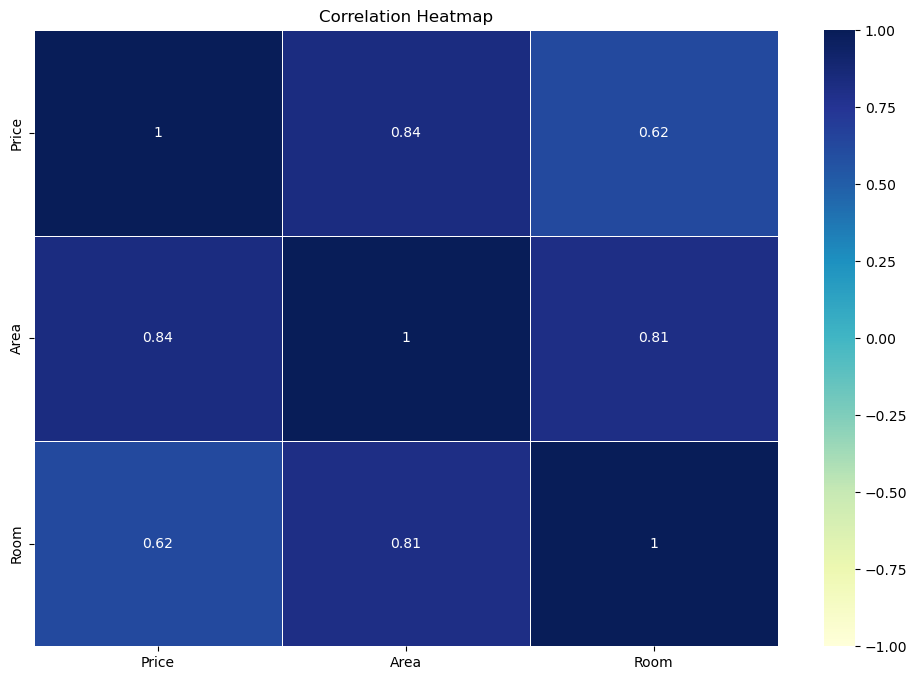

In [21]:
selected_columns_df = df[['Price','Area','Room']]

# Calculate the correlation matrix
corr = selected_columns_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


### Feature Engineering

In [22]:
import numpy as np

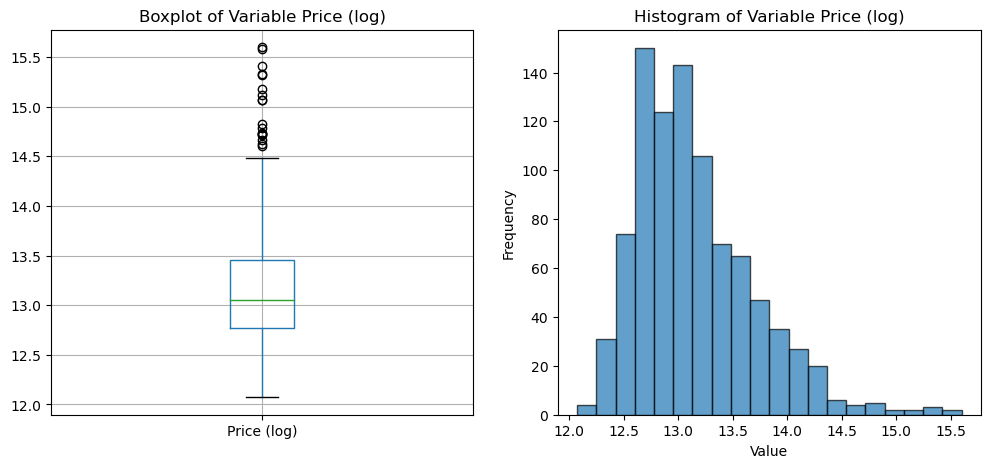

In [23]:
df['Price (log)'] = np.log(df['Price'])
plotting_boxplot_and_histogram(df, 'Price (log)')

In [24]:
outlier_indices = finding_outliers(df, 'Price (log)')
outlier_indices_list = outlier_indices.tolist()

total_outlier_list.extend(outlier_indices_list)

The number of points above: 18
The number of points below: 0
--> Total Number of Outliers: 18


In [25]:
df['Area Code'] = df['Zip'].astype(str).str[:4]
df

,Address,Zip,Price,Area,Room,Lon,Lat,Price (log),Area Code
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,13.437174,1091
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,13.071070,1059
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,13.652992,1097
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,13.270783,1060
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,13.487006,1036
...,...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,13.527828,1097
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,12.765688,1033
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,12.765688,1058
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,13.303017,1095


In [26]:
unique_code_lst = []
for i, r in df.iterrows():
    code = r['Area Code']
    if code in unique_code_lst:
        pass
    else:
        unique_code_lst.append(code)
print(len(unique_code_lst))

70


In [27]:
counts = df['Area Code'].value_counts()
counts_df = counts.reset_index()

# Rename the columns of the new DataFrame
counts_df.columns = ['Area Code', 'Count']
counts_df

,Area Code,Count
0,1017,32
1,1055,29
2,1068,26
3,1053,26
4,1018,25
...,...,...
65,1023,4
66,1108,3
67,1028,2
68,1109,2


In [28]:
import numpy as np

In [29]:
# boroughs of amsterdam
boroughs_df = pd.DataFrame(np.array([
    [1011, 1019, "Centrum"], [1020, 1039, "Noord"], [1040, 1049, "Westpoort"], 
    [1050, 1059, "West"], [1060, 1069, "Nieuw West"], [1070, 1083, "Zuid"], 
    [1086, 1099, "Oost"], [1100, 1109, "Zuidoost"]]),
    columns = ['lower_limit', 'upper_limmit', 'district_name']) 

boroughs_df

,lower_limit,upper_limmit,district_name
0,1011,1019,Centrum
1,1020,1039,Noord
2,1040,1049,Westpoort
3,1050,1059,West
4,1060,1069,Nieuw West
5,1070,1083,Zuid
6,1086,1099,Oost
7,1100,1109,Zuidoost


In [30]:
# creating a new column for the borough through apply and lambda method
df['Borough'] = df['Area Code'].apply(lambda x: boroughs_df.loc[
    (boroughs_df['lower_limit'] <= x) & (boroughs_df['upper_limmit'] >= x), 
    'district_name'].values[0]
    )

In [31]:
df['Borough'].value_counts()

Borough
Centrum       186
West          179
Nieuw West    153
Zuid          123
Noord         105
Oost           99
Zuidoost       79
Name: count, dtype: int64

In [32]:
print("The Median number of each data for each area code is",counts_df['Count'].median())

The Median number of each data for each area code is 12.5


### Visualisation

In [33]:
import plotly.express as px

In [34]:
df = df.dropna()

In [35]:
# Access token
px.set_mapbox_access_token('pk.eyJ1IjoiZGVubmlzd2lua2xlcjY4IiwiYSI6ImNsa3R5YnlsbzBoMTMza3BuY2Y2ZGpmdTYifQ.MNqZ4oP1LXDEIwXLcLX39g')

# Specifying the data which should be shown
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon",
                        color="Price",
                        size='Price',
                        color_discrete_map=["fuchsia"],
                        zoom=9.8, height=500)


# Specifying Map Type
fig.update_layout(
    mapbox_style="light",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "Amsterdam Property Information",
        }
      ])

fig.show()

In [36]:
# Sort the DataFrame by the 'Price' column in descending order
df_sorted = df.sort_values(by='Price', ascending=False)

# Select the top 50 records
df_top50 = df_sorted.head(50)
df_top50['Highest/Lowest 50'] = 'Highest'

df_sorted = df.sort_values(by='Price', ascending=True)

# Select the top 50 records
df_low50 = df_sorted.head(50)
df_low50['Highest/Lowest 50'] = 'Lowest'

df_combined = pd.concat([df_top50, df_low50], ignore_index=True)

C:\Users\denni\AppData\Local\Temp\ipykernel_12668\1929554574.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\denni\AppData\Local\Temp\ipykernel_12668\1929554574.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# Specifying the data which should be shown
fig = px.scatter_mapbox(df_combined, lat="Lat", lon="Lon",
                        color="Highest/Lowest 50",
                        color_discrete_map={'Highest': 'green', 'Lowest': 'red'},
                        zoom=9.8, 
                        height=500
                        )


# Specifying Map Type
fig.update_layout(
    mapbox_style="light",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "Amsterdam Property Information",
        }
      ])

In [38]:
df

,Address,Zip,Price,Area,Room,Lon,Lat,Price (log),Area Code,Borough
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,13.437174,1091,Oost
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,13.071070,1059,West
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,13.652992,1097,Oost
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,13.270783,1060,Nieuw West
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,13.487006,1036,Noord
...,...,...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,13.527828,1097,Oost
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,12.765688,1033,Noord
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,12.765688,1058,West
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,13.303017,1095,Oost


In [39]:
df['Index'] = df.index

C:\Users\denni\AppData\Local\Temp\ipykernel_12668\2481523239.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon",
                        color="Borough",
                        zoom=9.8, 
                        height=500,
                        hover_data=['Index']
                        )


# Specifying Map Type
fig.update_layout(
    mapbox_style="light",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "Amsterdam Property Information",
        }
      ])

### cleaning based on the visualisation

In [41]:
index_to_drop_lst = [212, 627]
index_to_change_lst = [236]

# these indexes need to be dropped as the houses are in Haarlem not Amsterdam
df = df.drop(index_to_drop_lst, inplace=False)

df_slice = df.loc[df['Index'] == 236]
df_slice

,Address,Zip,Price,Area,Room,Lon,Lat,Price (log),Area Code,Borough,Index
236,"Van der Hoopstraat 33 A2, Amsterdam",1051 VB,425000.0,56,2,4.943696,52.338795,12.959844,1051,West,236


In [42]:
# after investigation seems to be a mistake for the longitude and lattiude
# new longitude and lattitude found on https://www.latlong.net/
new_lat = 52.384330
new_lon = 4.874410

# Updating coordinates
df.loc[df['Index'] == 236, 'Lat'] = new_lat
df.loc[df['Index'] == 236, 'Lon'] = new_lon

df

,Address,Zip,Price,Area,Room,Lon,Lat,Price (log),Area Code,Borough,Index
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,13.437174,1091,Oost,0
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,13.071070,1059,West,1
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,13.652992,1097,Oost,2
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,13.270783,1060,Nieuw West,3
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,13.487006,1036,Noord,4
...,...,...,...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,13.527828,1097,Oost,919
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,12.765688,1033,Noord,920
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,12.765688,1058,West,921
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,13.303017,1095,Oost,922


In [43]:
df.to_csv("datasets/amsterdam-house-prices-clean.csv", index=False)